In [1]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
matrix_data = pan.read_csv("mushrooms.csv")

In [14]:
features = pan.get_dummies(matrix_data.drop("class", axis = 1), drop_first = True)
label = matrix_data["class"]

In [7]:
feature_train, feature_test, label_train, label_test = train_test_split(features, label, random_state = 42, test_size = 0.15)

In [20]:
gradient_learner = GradientBoostingClassifier()
param_grid = {"learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9, 1], "n_estimators": [50, 70, 100, 150], "max_depth": [2, 3, 4, 6]}
gridder = GridSearchCV(gradient_learner, param_grid, cv = 5, verbose = 1, n_jobs = 7)

In [21]:
gridder.fit(feature_train, label_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=7,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'max_depth': [2, 3, 4, 6],
                         'n_estimators': [50, 70, 100, 150]},
             verbose=1)

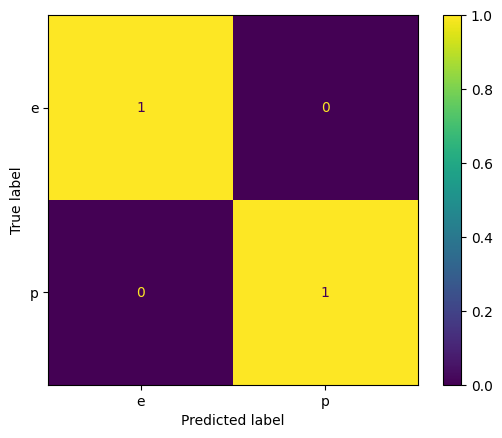

In [23]:
ConfusionMatrixDisplay.from_predictions(label_test, gridder.predict(feature_test), normalize = "true")

In [25]:
gridder.best_estimator_

GradientBoostingClassifier(n_estimators=150)

In [26]:
print(classification_report(label_test, gridder.predict(feature_test)))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [34]:
feature_importances = pan.DataFrame(data = gridder.best_estimator_.feature_importances_, index = features.columns, columns = ["Importances"])
important_features = feature_importances[feature_importances["Importances"] > 0.001]
important_features.sort_values(by = "Importances")

,Importances
spore-print-color_w,0.001108
cap-surface_g,0.001131
odor_p,0.001146
cap-color_y,0.002289
population_c,0.002628
stalk-color-below-ring_y,0.003200
spore-print-color_u,0.003391
stalk-color-below-ring_c,0.004226
ring-number_o,0.005651
spore-print-color_h,0.007392


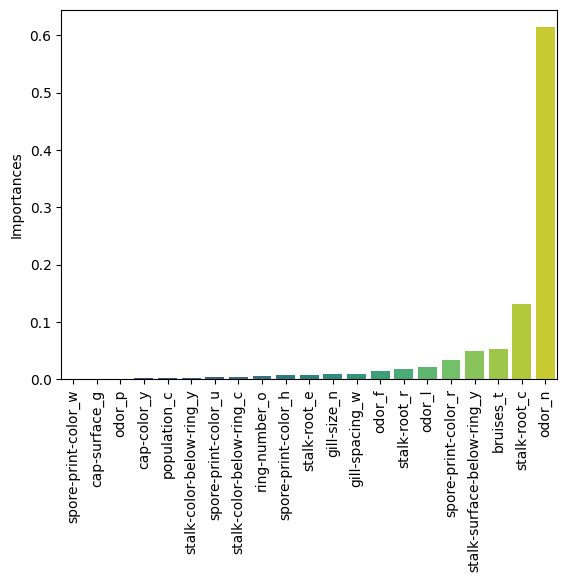

In [40]:
sns.barplot(data = important_features.sort_values(by = "Importances"), x = important_features.sort_values(by = "Importances").index, y = "Importances", palette = "viridis")
plotter.xticks(rotation = 90);